<a href="https://colab.research.google.com/github/Peeyusha-tech/CountStepsToZero/blob/master/Covid-19Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://cb.lk/covid_19

--2021-09-14 21:46:12--  https://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 104.21.72.203, 172.67.187.81, 2606:4700:3032::ac43:bb51, ...
Connecting to cb.lk (cb.lk)|104.21.72.203|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-09-14 21:46:12--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-09-14 21:46:13--  https://www.dropbox.com/s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location:

In [2]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [3]:
TRAIN_PATH="CovidDataset/Train"
VAL_PATH="CovidDataset/Test"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [5]:
model= Sequential()
model.add(Conv2D(32,kernel_size= (3,3), activation='relu',input_shape=(256,256,3)) )

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 64)        0

In [7]:
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
Train_generator= train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size=(256,256),
    batch_size=16,
    class_mode='binary'
)

Found 224 images belonging to 2 classes.


In [8]:
Train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [9]:
test_datagen=image.ImageDataGenerator(
    rescale=1./255
)

validation_generator=test_datagen.flow_from_directory(
    'CovidDataset/Val',
    target_size=(256,256),
    batch_size=16,
    class_mode='binary'
)

Found 60 images belonging to 2 classes.


In [10]:
hist= model.fit_generator(
    Train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2

)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
8/8 [==============================] - 54s 7s/step - loss: 0.8046 - accuracy: 0.5859 - val_loss: 0.7278 - val_accuracy: 0.3438
Epoch 2/10
8/8 [==============================] - 49s 6s/step - loss: 0.5587 - accuracy: 0.7266 - val_loss: 0.5572 - val_accuracy: 0.9688
Epoch 3/10
8/8 [==============================] - 49s 6s/step - loss: 0.3475 - accuracy: 0.8750 - val_loss: 0.2402 - val_accuracy: 0.9375
Epoch 4/10
8/8 [==============================] - 49s 6s/step - loss: 0.1646 - accuracy: 0.9531 - val_loss: 0.1836 - val_accuracy: 0.9062
Epoch 5/10
8/8 [==============================] - 49s 6s/step - loss: 0.2331 - accuracy: 0.9141 - val_loss: 0.0931 - val_accuracy: 0.9688
Epoch 6/10
8/8 [==============================] - 49s 6s/step - loss: 0.1799 - accuracy: 0.9297 - val_loss: 0.1308 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 49s 6s/step - loss: 0.1073 - accuracy: 0.9688 - val_loss: 0.0547 - val_accuracy: 1.0000
Epoch 8/10
8/8 [==================

In [11]:
summary=hist.history
print(summary)

{'loss': [0.8046270608901978, 0.5587298274040222, 0.34751516580581665, 0.16462579369544983, 0.23311614990234375, 0.179928719997406, 0.10729426890611649, 0.19886955618858337, 0.11419743299484253, 0.19155187904834747], 'accuracy': [0.5859375, 0.7265625, 0.875, 0.953125, 0.9140625, 0.9296875, 0.96875, 0.9140625, 0.9453125, 0.9296875], 'val_loss': [0.7278031706809998, 0.5572330951690674, 0.24022462964057922, 0.18355506658554077, 0.09310989826917648, 0.13077595829963684, 0.05469256266951561, 0.16244468092918396, 0.1783856749534607, 0.07228600233793259], 'val_accuracy': [0.34375, 0.96875, 0.9375, 0.90625, 0.96875, 1.0, 1.0, 0.96875, 0.96875, 0.96875]}


In [12]:
model.save("model_adv.h5")
model.evaluate(Train_generator)

14/14 [==============================] - 24s 2s/step - loss: 0.0968 - accuracy: 0.9732


[0.09676502645015717, 0.9732142686843872]

In [13]:
model.evaluate(validation_generator)

4/4 [==============================] - 6s 1s/step - loss: 0.0910 - accuracy: 0.9667


[0.091009721159935, 0.9666666388511658]

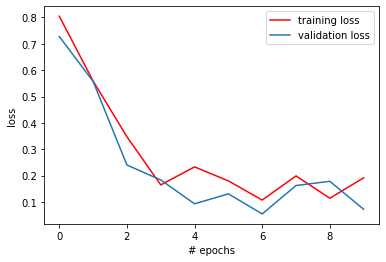

In [14]:
from matplotlib import pyplot as plt

plt.plot(hist.history['loss'],'r',label='training loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

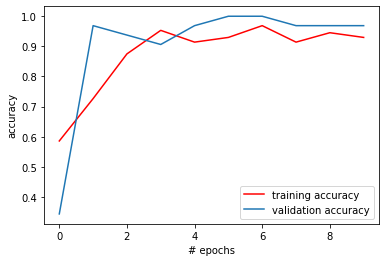

In [15]:
plt.plot(hist.history['accuracy'],'r',label='training accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [16]:
model=load_model('model_adv.h5')
import os

Train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [17]:
y_actual=[]
y_test=[]

In [18]:
import os
path_normal="./CovidDataset/Val/Normal/"
for i in os.listdir(path_normal):
   
    img=image.load_img(path_normal+i, target_size=(256,256))
     
    img=image.img_to_array(img)

    img=np.expand_dims(img,axis=0) 
    p=model.predict(img)
    y_test.append(p[0,0])
    y_actual.append(1)
 

In [19]:

path_covid="./CovidDataset/Val/Covid/"
for i in os.listdir(path_covid):
  
    img=image.load_img(path_covid+i, target_size=(256,256))
     
    img=image.img_to_array(img)

    img=np.expand_dims(img,axis=0) 
    p=model.predict(img)
    y_test.append(p[0,0])
    y_actual.append(0)

In [20]:
y_actual=np.array(y_actual)
y_test= np.array(y_test)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
cm= confusion_matrix(y_actual,y_test)

In [23]:
import seaborn as sns

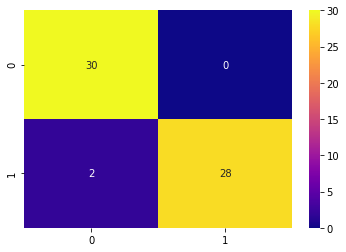

In [24]:
sns.heatmap(cm, cmap="plasma",annot=True)